In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_excel('data.xlsx')
print("Dataset loaded. Shape:", df.shape)

Dataset loaded. Shape: (16857, 29)


In [ ]:
# Parse timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.dayofweek

In [ ]:
# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16013 non-null  object        
 2   lighting_energy               16048 non-null  object        
 3   zone1_temperature             15990 non-null  object        
 4   zone1_humidity                16056 non-null  object        
 5   zone2_temperature             16004 non-null  object        
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [ ]:
# Missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_vari

In [ ]:
# Target distribution
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')  # Convert to numeric, invalid values become NaN
df.dropna(subset=['equipment_energy_consumption'], inplace=True)  # Drop rows with NaN in 'equipment_energy_consumption'

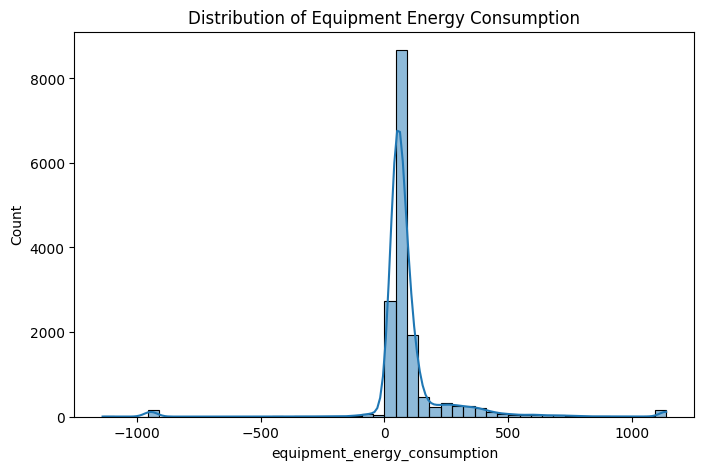

In [ ]:
# Continue with your plotting code
plt.figure(figsize=(8,5))
sns.histplot(df['equipment_energy_consumption'], bins=50, kde=True)
plt.title("Distribution of Equipment Energy Consumption")
plt.show()

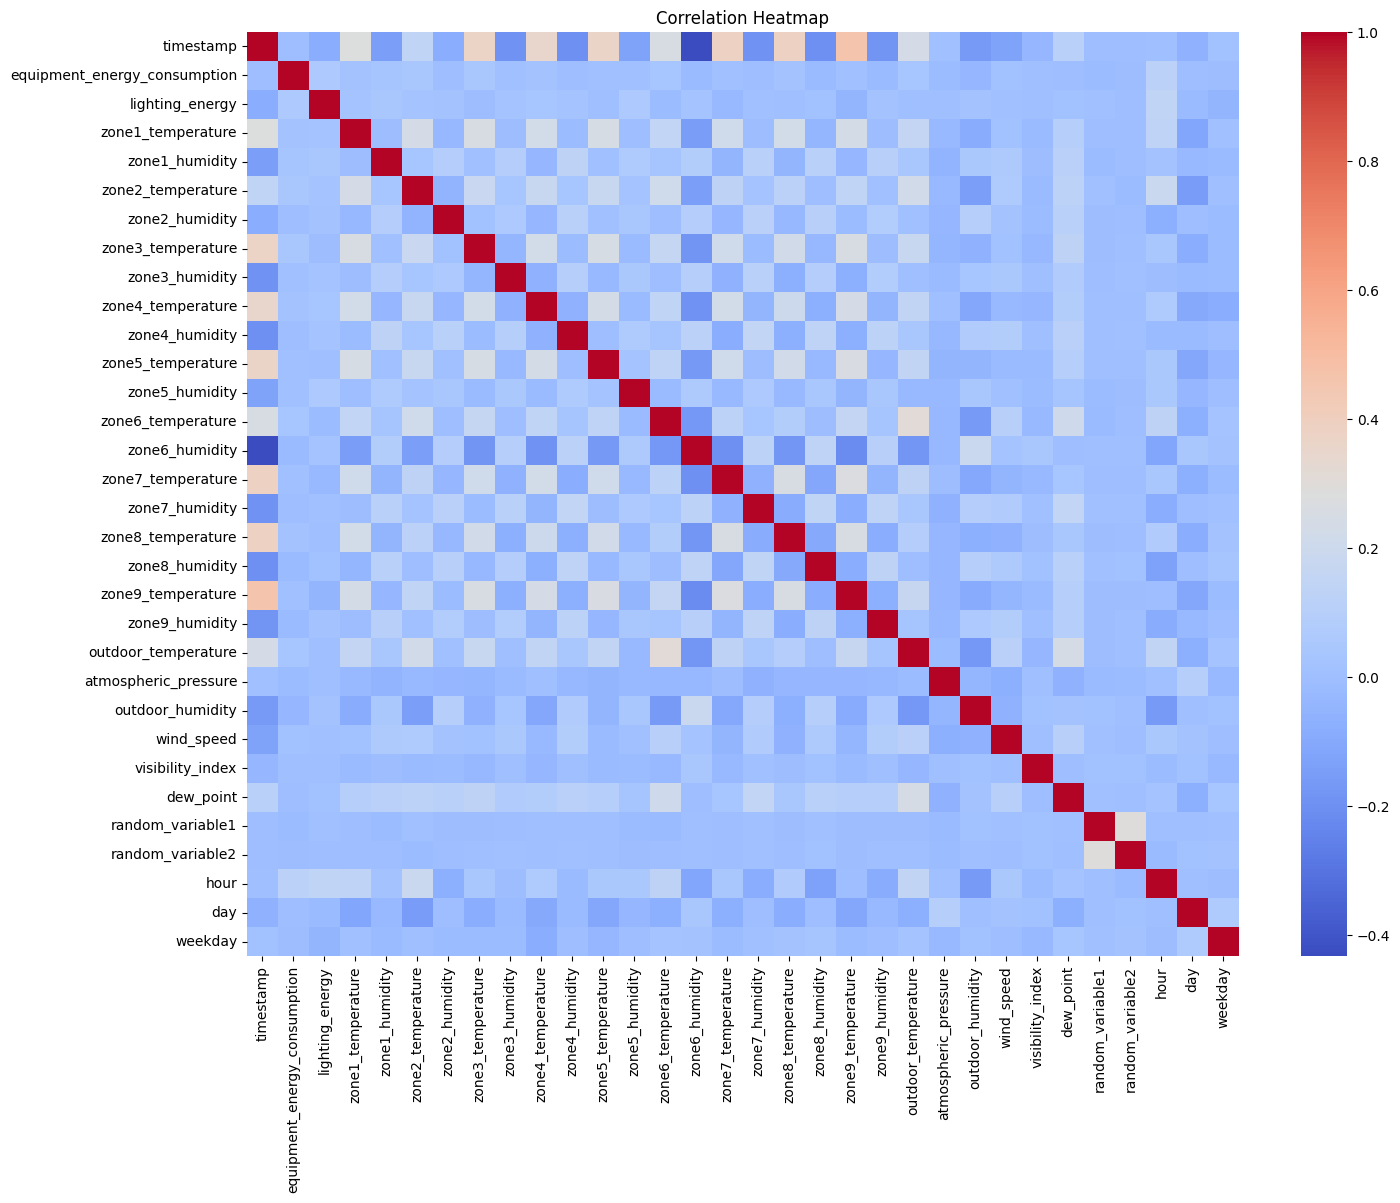

In [ ]:
# Correlation heatmap
plt.figure(figsize=(16,12))
# Convert all columns to numeric, invalid values become NaN
numeric_df = df.apply(pd.to_numeric, errors='coerce')
# Drop columns with all NaN values
numeric_df = numeric_df.dropna(axis=1, how='all')
# Calculate correlation matrix
corr = numeric_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# High correlations with target
target_corr = corr['equipment_energy_consumption'].sort_values(ascending=False)
print("Top correlations with target:\n", target_corr.head(10))

Top correlations with target:
 equipment_energy_consumption    1.000000
hour                            0.120745
lighting_energy                 0.057007
zone2_temperature               0.042058
zone3_temperature               0.038033
outdoor_temperature             0.033223
zone6_temperature               0.032136
zone1_humidity                  0.026997
zone8_temperature               0.019716
zone1_temperature               0.018402
Name: equipment_energy_consumption, dtype: float64


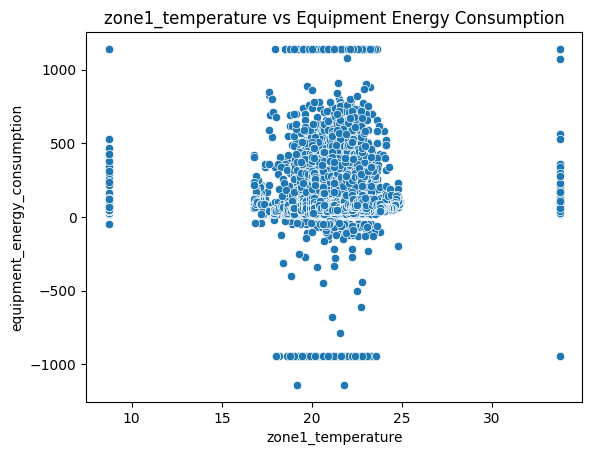

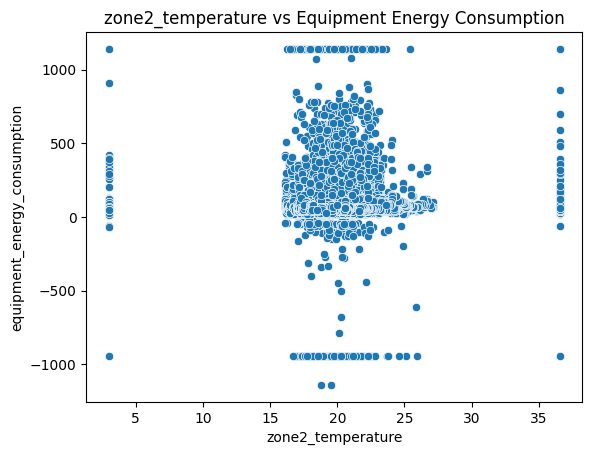

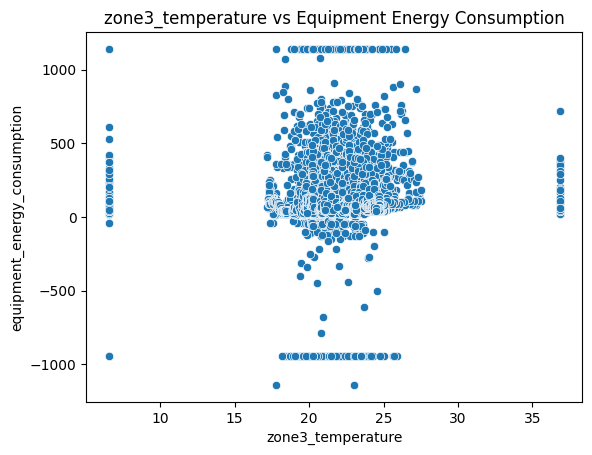

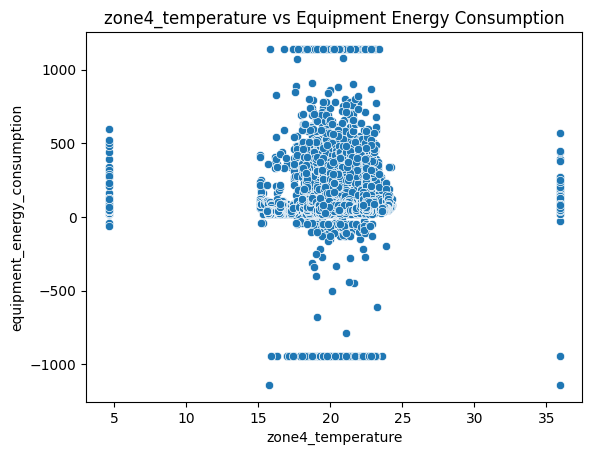

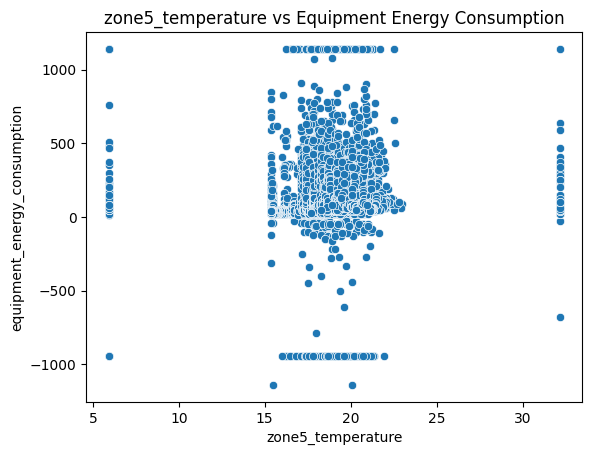

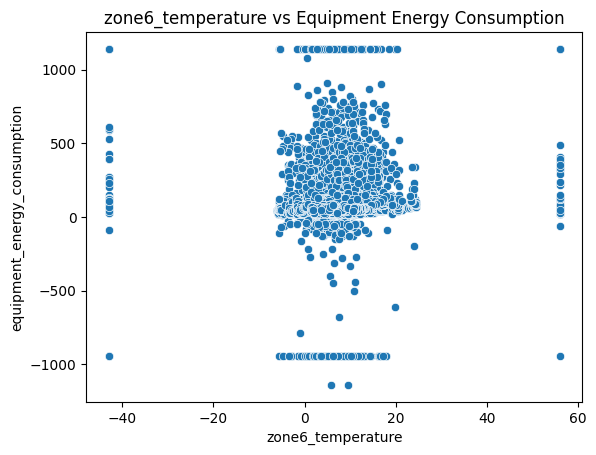

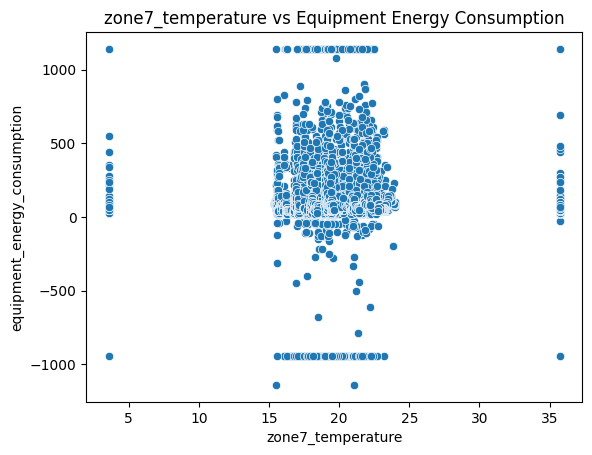

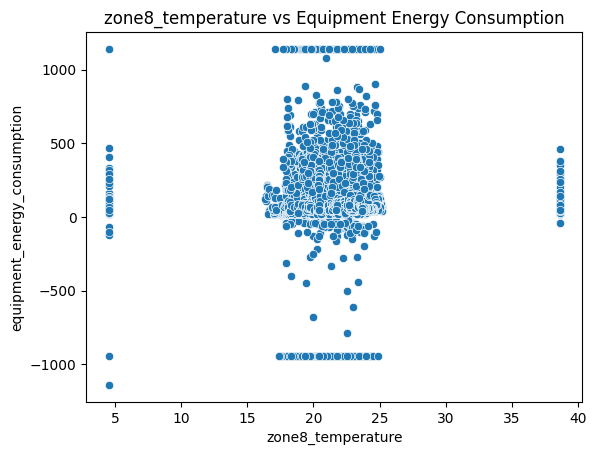

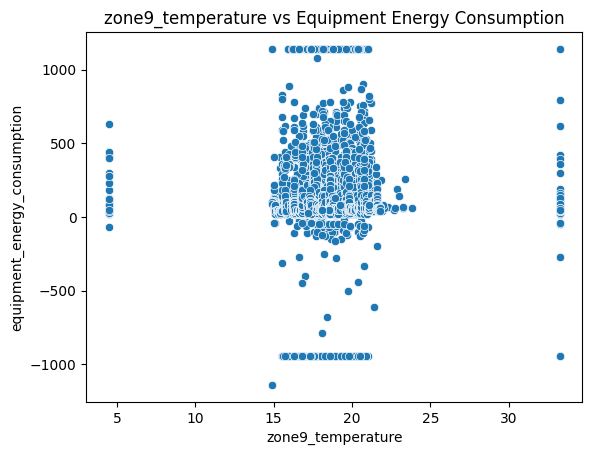

In [ ]:
# Zone-wise temperature vs energy
zone_temp_cols = [col for col in df.columns if 'temperature' in col and 'zone' in col]
for col in zone_temp_cols:
    # Convert the column to numeric, replacing errors with NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Drop rows with NaN in the current zone temperature column
    df.dropna(subset=[col], inplace=True)

    sns.scatterplot(data=df, x=col, y='equipment_energy_consumption')
    plt.title(f"{col} vs Equipment Energy Consumption")
    plt.show()

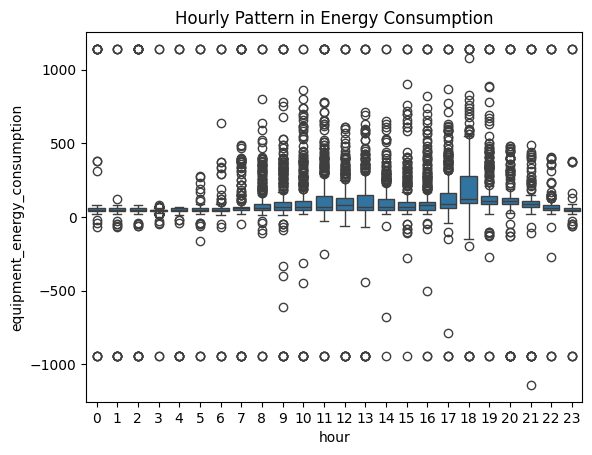

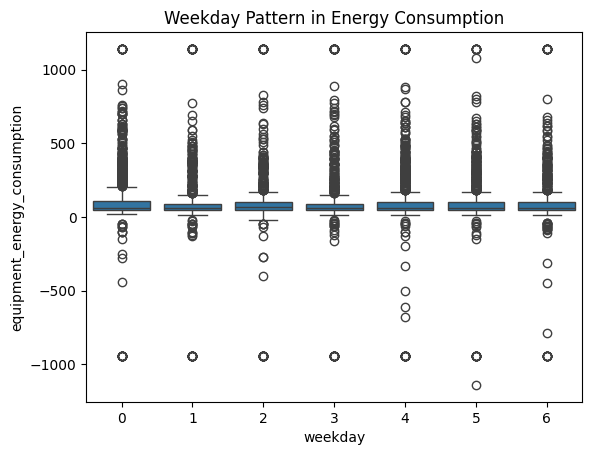

In [ ]:
# Boxplots for time-based patterns
sns.boxplot(x='hour', y='equipment_energy_consumption', data=df)
plt.title("Hourly Pattern in Energy Consumption")
plt.show()

sns.boxplot(x='weekday', y='equipment_energy_consumption', data=df)
plt.title("Weekday Pattern in Energy Consumption")
plt.show()

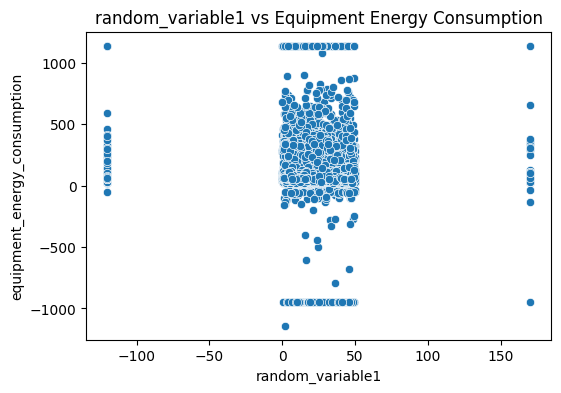

Correlation with target (random_variable1): -0.018677404616099944


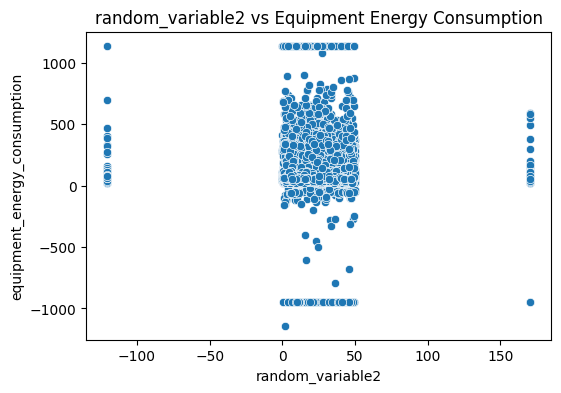

Correlation with target (random_variable2): -0.014929646421526045


In [ ]:
# Random variable evaluation
for var in ['random_variable1', 'random_variable2']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=var, y='equipment_energy_consumption')
    plt.title(f"{var} vs Equipment Energy Consumption")
    plt.show()
    print(f"Correlation with target ({var}):", df[var].corr(df['equipment_energy_consumption']))


Skewness: nan
Kurtosis: nan


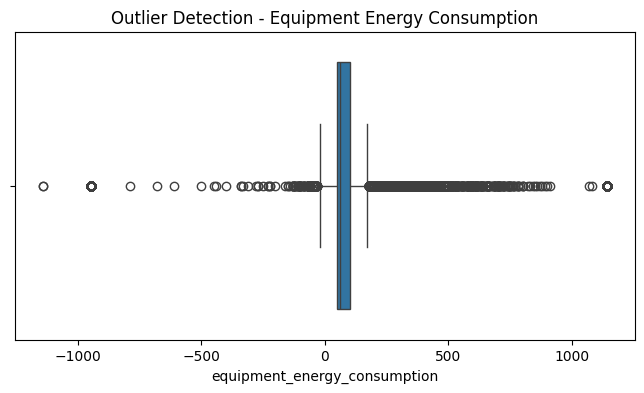

                 feature       VIF
26                 month  2.494954
13     zone9_temperature  1.326806
8         zone6_humidity  1.295370
15   outdoor_temperature  1.278059
11     zone8_temperature  1.233695
7      zone6_temperature  1.225933
9      zone7_temperature  1.223693
5      zone5_temperature  1.211338
20             dew_point  1.210092
3      zone4_temperature  1.208821
1      zone3_temperature  1.202643
24                   day  1.174781
23                  hour  1.144346
4         zone4_humidity  1.131631
12        zone8_humidity  1.130107
17      outdoor_humidity  1.118754
10        zone7_humidity  1.111252
21      random_variable1  1.091340
14        zone9_humidity  1.090019
22      random_variable2  1.089395
18            wind_speed  1.076472
2         zone3_humidity  1.073144
0         zone2_humidity  1.060522
6         zone5_humidity  1.040488
16  atmospheric_pressure  1.035787
25               weekday  1.024819
19      visibility_index  1.007098


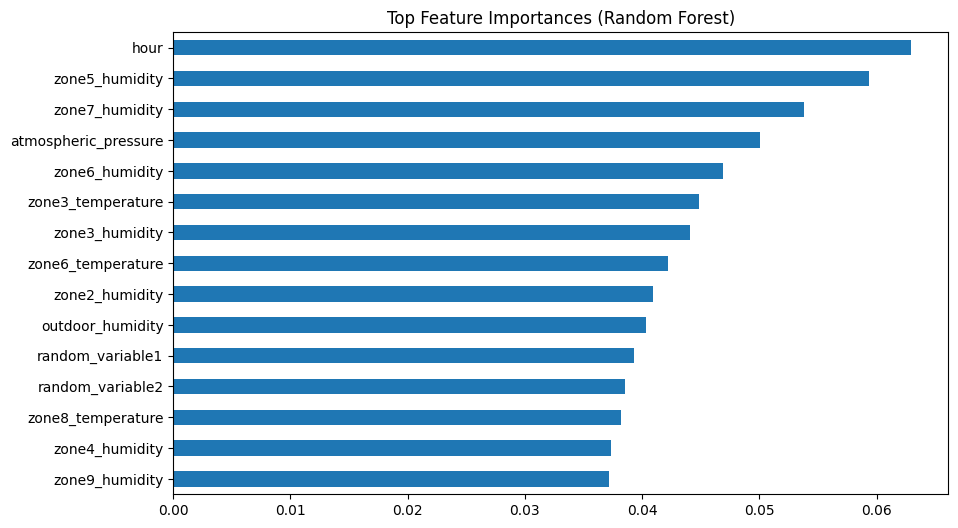

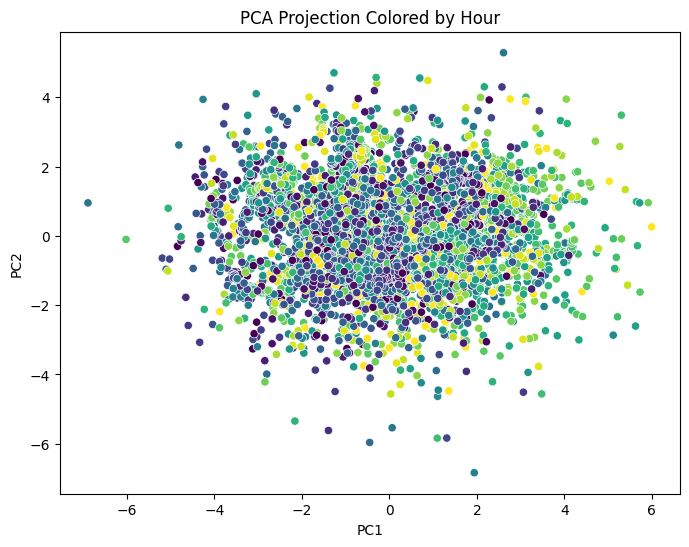

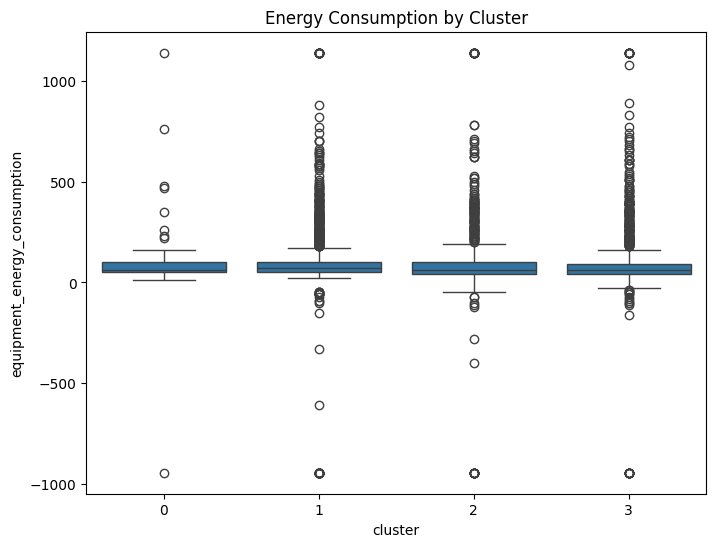

<ipython-input-24-5484d9be45cf>:96: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ts = df.set_index('timestamp').resample('H')[target].mean().dropna()
<ipython-input-24-5484d9be45cf>:99: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ts = df.set_index('timestamp').resample('H')[target].mean().dropna()
<ipython-input-24-5484d9be45cf>:102: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ts = df_ts.asfreq('H')  # or df_ts.asfreq('1H')


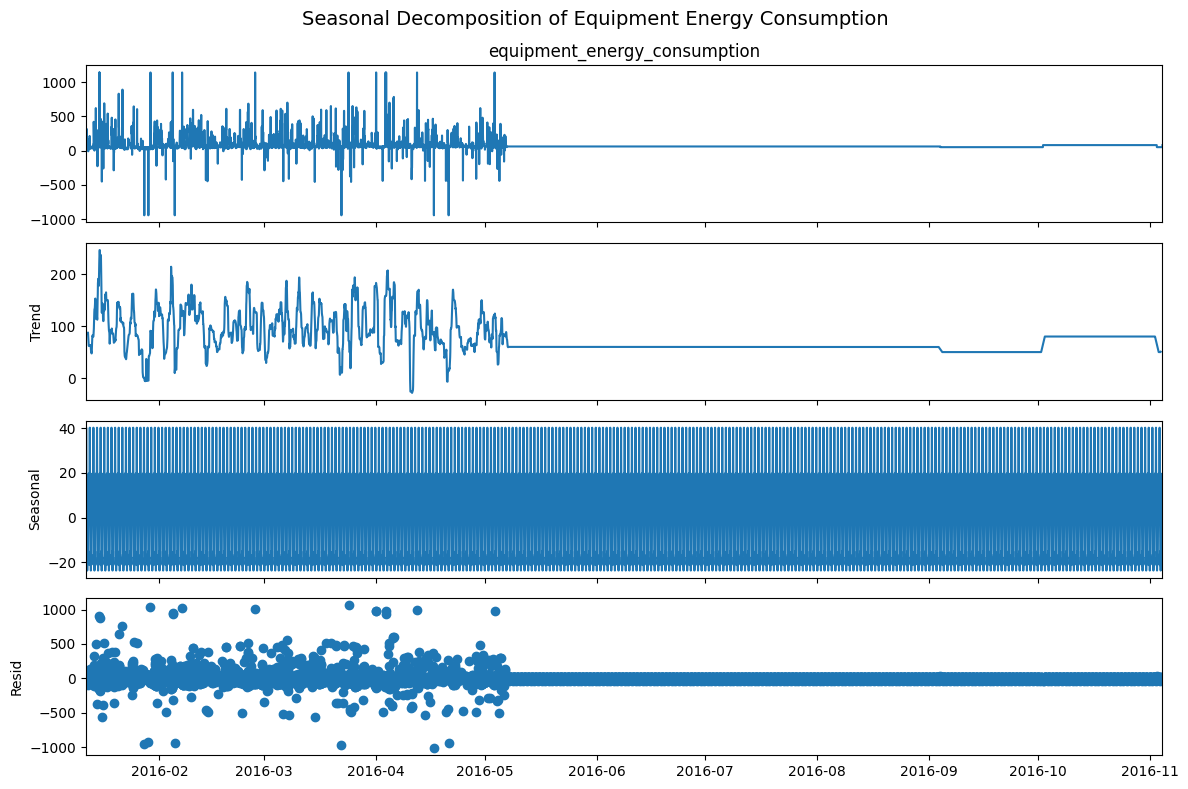

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import statsmodels.api as sm

# Load and parse timestamp
df = pd.read_excel('data.xlsx')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
# Skewness & Kurtosis
print(f"Skewness: {skew(df[target])}")
print(f"Kurtosis: {kurtosis(df[target])}")

# --- 2. Outlier Detection ---
# Convert 'equipment_energy_consumption' to numeric, replace errors with NaN
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')
# Remove rows with 'error' in 'equipment_energy_consumption' column
df = df[df['equipment_energy_consumption'] != 'error']
# Drop rows with NaN in 'equipment_energy_consumption' if any exist after removing 'error'
df.dropna(subset=['equipment_energy_consumption'], inplace=True)

# Now proceed with your plotting code:
plt.figure(figsize=(8,4))
sns.boxplot(x=df[target]) # Using target variable defined earlier
plt.title("Outlier Detection - Equipment Energy Consumption")
plt.show()


# --- 4. Multicollinearity Check ---
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features and drop the target variable
X = df.select_dtypes(include=np.number).drop(columns=[target])

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any missing values
X = X.dropna()

# Update df to keep only rows in X
df = df.loc[X.index]

# Now proceed with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif.sort_values(by="VIF", ascending=False))


# --- 6. Feature Importance via Random Forest ---
features = df.select_dtypes(include=np.number).drop(columns=[target]).columns
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df[features], df[target])
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(15).plot(kind='barh')
plt.title("Top Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

# --- 7. PCA for Dimensionality Insight ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['hour'], palette='viridis', legend=False)
plt.title("PCA Projection Colored by Hour")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# --- 8. Clustering (KMeans) Insight ---
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y=target, data=df)
plt.title("Energy Consumption by Cluster")
plt.show()

# --- 9. Time Series Decomposition (Trend/Seasonality) ---
df_ts = df.set_index('timestamp').resample('H')[target].mean().dropna()

# Force the frequency to be hourly if it's not already set
df_ts = df_ts.asfreq('H')  # or df_ts.asfreq('1H')

# Fill missing values using forward fill
df_ts = df_ts.ffill()

decomposition = sm.tsa.seasonal_decompose(df_ts, model='additive')
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Seasonal Decomposition of Equipment Energy Consumption", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install dtaidistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.8 MB/s eta 0:00:00


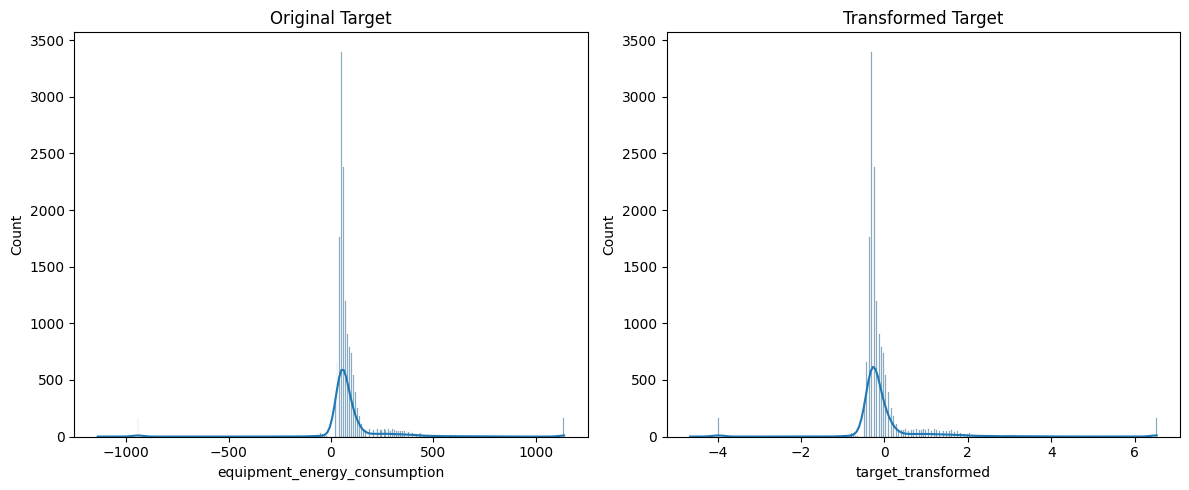

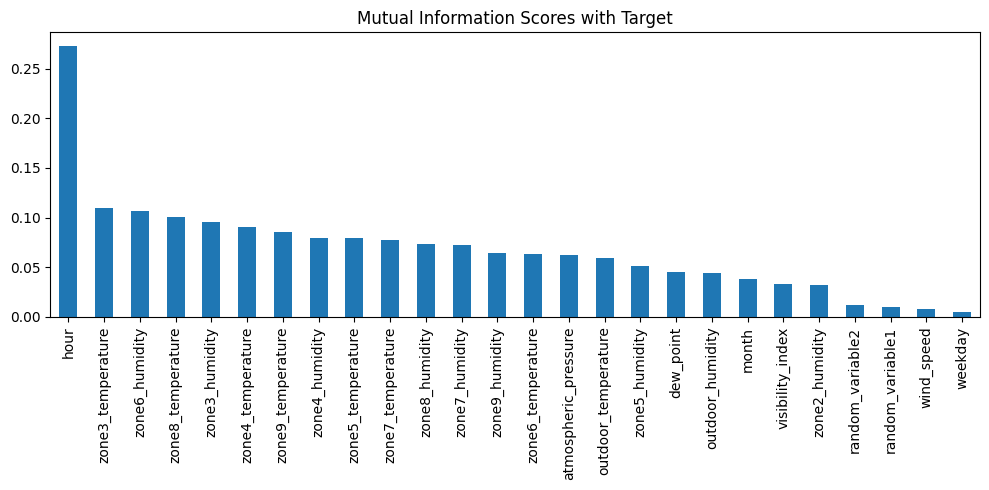

Top Feature Interactions (Correlated with target):
hour * zone3_temperature: nan
hour * zone6_humidity: nan
hour * zone8_temperature: nan
hour * zone3_humidity: nan
zone3_temperature * zone6_humidity: nan
zone3_temperature * zone8_temperature: nan
zone3_temperature * zone3_humidity: nan
zone6_humidity * zone8_temperature: nan
zone6_humidity * zone3_humidity: nan
zone8_temperature * zone3_humidity: nan


 97%|=================== | 15534/15945 [00:17<00:00]       

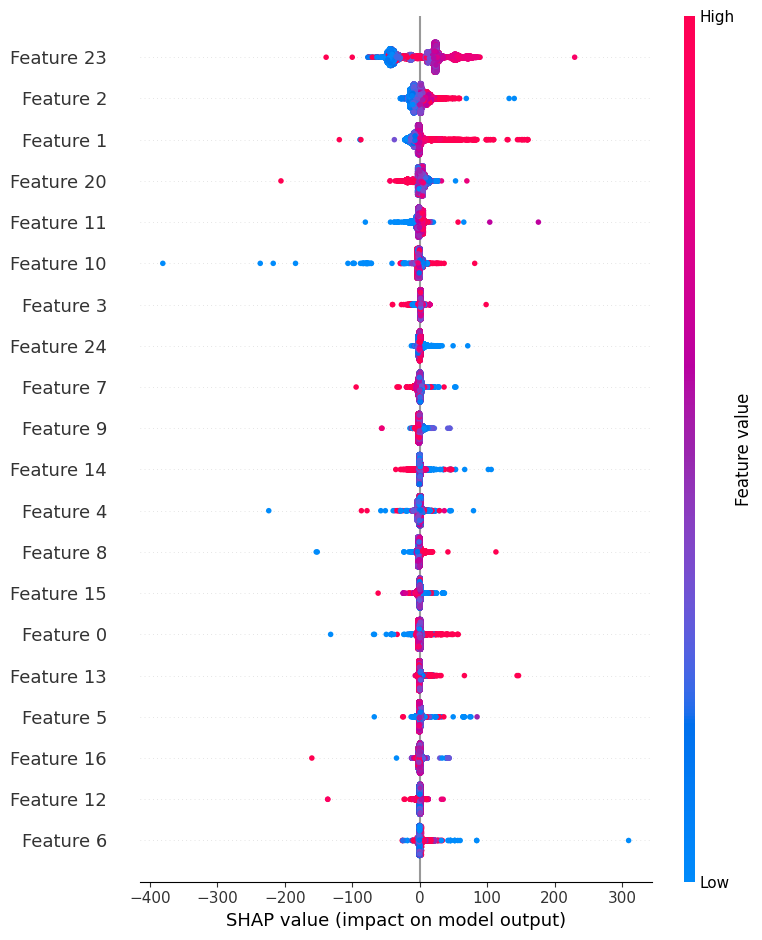

<ipython-input-40-87afadc06f66>:87: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_ts = df.set_index('timestamp').resample('H')[target].mean()


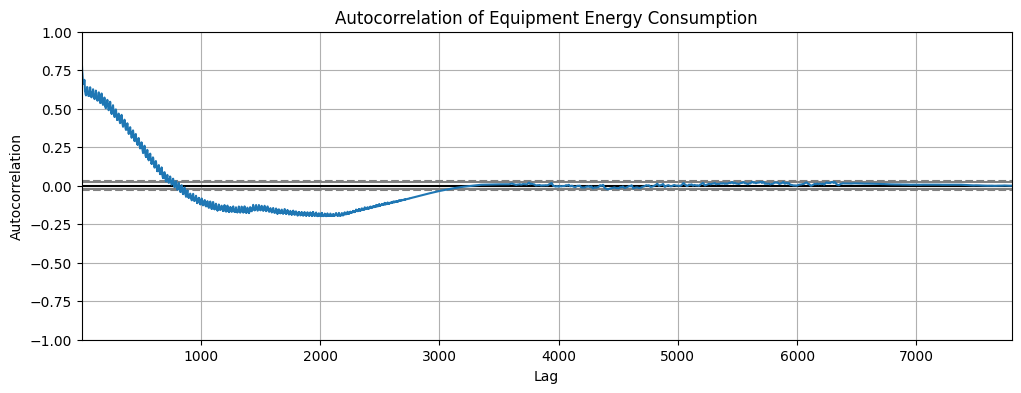

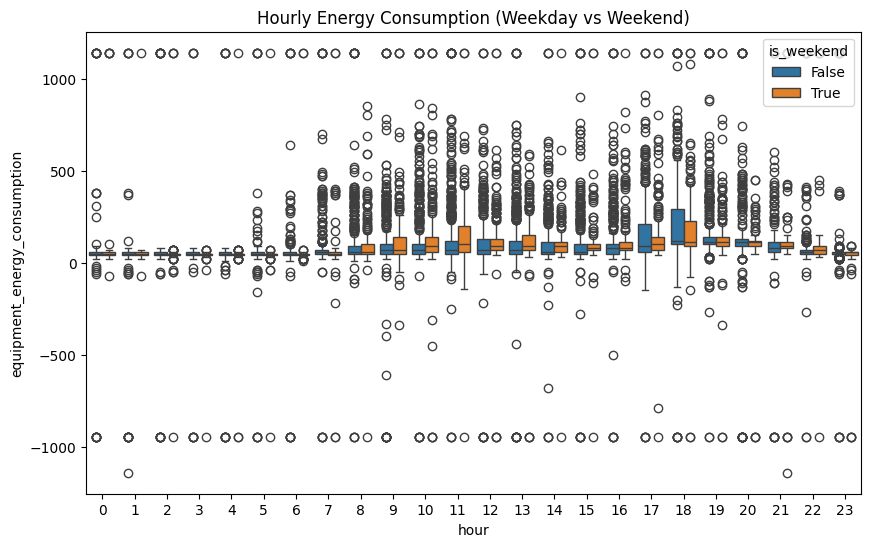

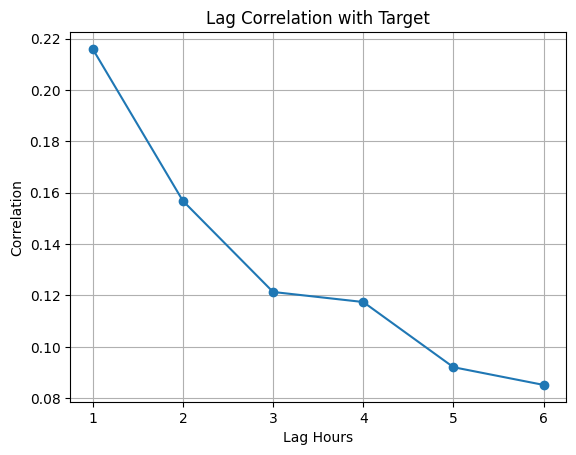

Cluster Profiles:
         zone2_humidity  zone3_temperature  zone3_humidity  zone4_temperature  \
cluster                                                                         
0                 37.22              20.47           36.60              19.38   
1                 39.31              22.98           36.58              21.49   
2                 42.73              20.97           42.85              19.22   
3                 39.23              21.74           38.20              20.34   

         zone4_humidity  zone5_temperature  zone5_humidity  zone6_temperature  \
cluster                                                                         
0                 34.57              18.01           49.33               1.45   
1                 36.59              20.20           48.09              10.08   
2                 44.47              18.43           55.25               6.93   
3                 36.65              19.31           49.71               5.93   

        

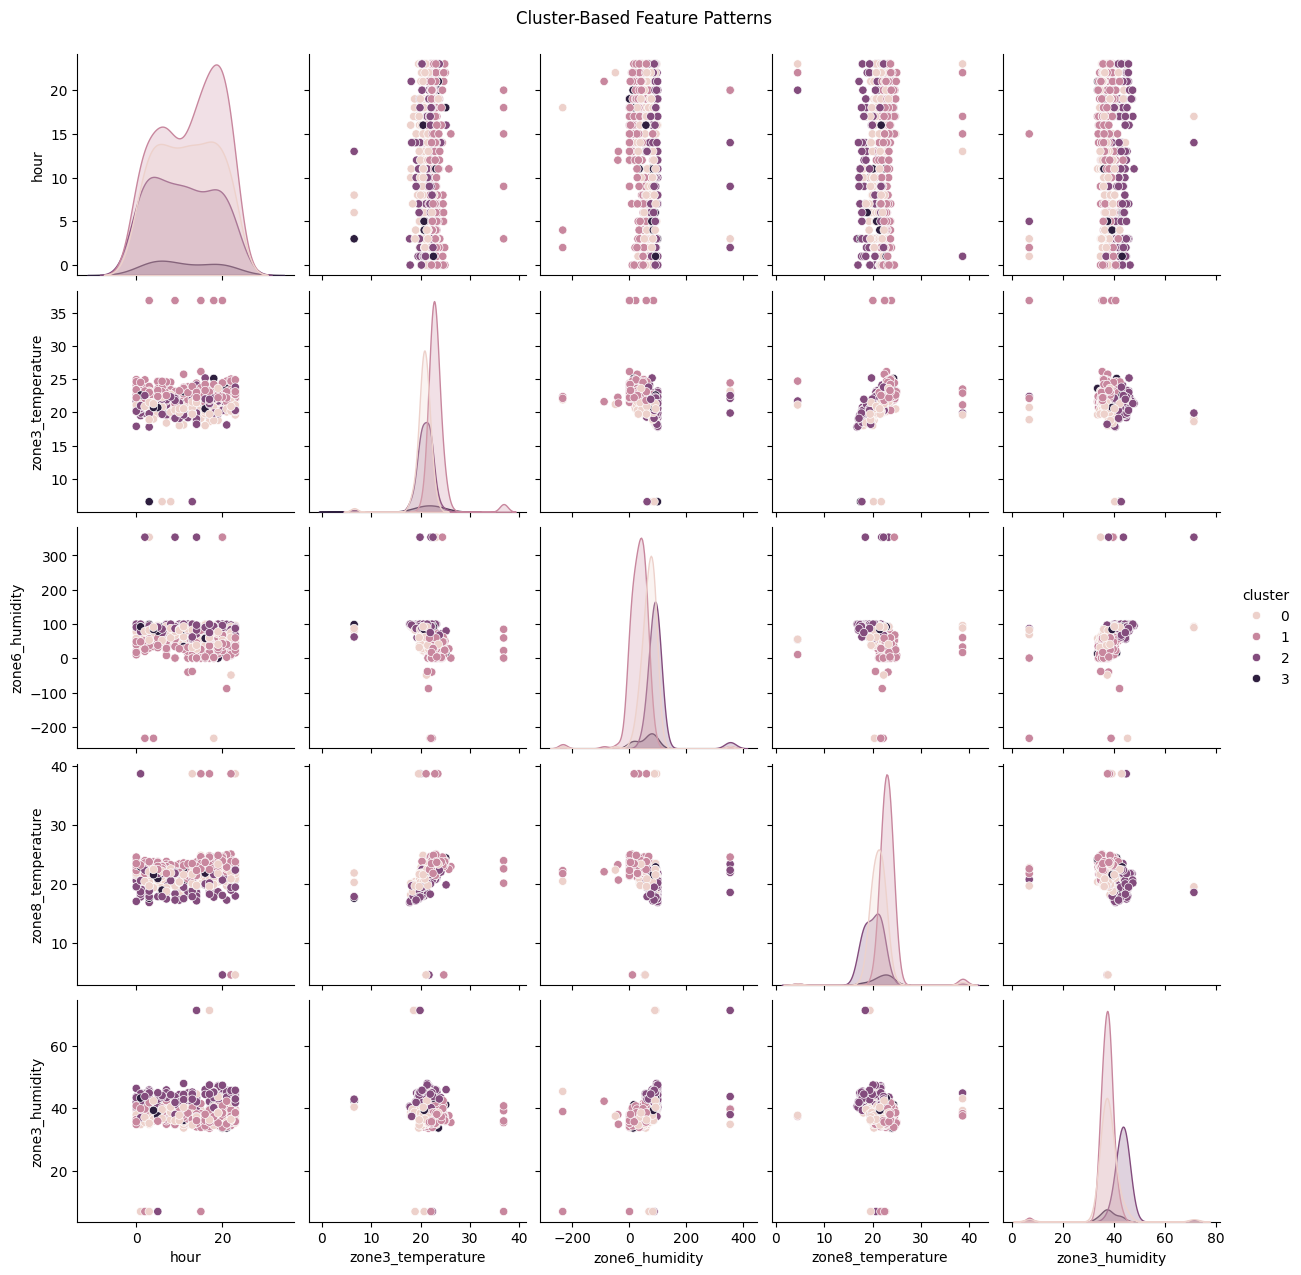

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from itertools import combinations
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.cluster import KMeans


# Load and process
df = pd.read_excel('data.xlsx')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday
df['is_weekend'] = df['weekday'] >= 5
df['month'] = df['timestamp'].dt.month

# Numerical and target separation
target = 'equipment_energy_consumption'
# Ensure 'equipment_energy_consumption' is numeric
df[target] = pd.to_numeric(df[target], errors='coerce')
# Drop rows with errors after conversion
# df = df[df['equipment_energy_consumption'] != 'error']  # Already handled by pd.to_numeric

# Drop rows with NaNs in the target to prevent issues later
df.dropna(subset=[target], inplace=True)

# Select numeric features, EXCLUDING the target column
numeric_features = df.select_dtypes(include=np.number).columns.drop(target)

# === 1. Power Transform Target Check ===
pt = PowerTransformer()
df['target_transformed'] = pt.fit_transform(df[[target]])

fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df[target], kde=True, ax=ax[0]).set(title='Original Target')
sns.histplot(df['target_transformed'], kde=True, ax=ax[1]).set(title='Transformed Target')
plt.tight_layout()
plt.show()

# === 2. Mutual Information Analysis ===
df_mi = df[numeric_features.tolist() + [target]].dropna()

mi = mutual_info_regression(df_mi[numeric_features], df_mi[target])
mi_scores = pd.Series(mi, index=numeric_features).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
mi_scores.plot(kind='bar')
plt.title("Mutual Information Scores with Target")
plt.tight_layout()
plt.show()

# === 3. Feature Interaction Analysis ===
top_features = mi_scores.head(5).index
interaction_scores = {}
for f1, f2 in combinations(top_features, 2):
    interaction = df[f1] * df[f2]
    corr = np.corrcoef(interaction, df[target])[0, 1]
    interaction_scores[f"{f1} * {f2}"] = corr

print("Top Feature Interactions (Correlated with target):")
for k, v in sorted(interaction_scores.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{k}: {v:.3f}")

# === 4. SHAP Explainability ===
X = df[numeric_features]
# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X = imputer.fit_transform(X)

model = GradientBoostingRegressor().fit(X, df[target])
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)

# === 5. Time-based Autocorrelation ===
df_ts = df.set_index('timestamp').resample('H')[target].mean()
df_ts = df_ts.interpolate()

plt.figure(figsize=(12,4))
autocorrelation_plot(df_ts)
plt.title("Autocorrelation of Equipment Energy Consumption")
plt.show()

# === 6. Seasonal Analysis ===
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='hour', y=target, hue='is_weekend')
plt.title("Hourly Energy Consumption (Weekday vs Weekend)")
plt.show()

# === 7. Lag Feature Creation and Correlation ===
df_ts = df_ts.reset_index(drop=True)

for lag in range(1, 7):
    # Calculate lagged values
    df[f'target_lag_{lag}'] = df[target].shift(lag)

lag_corrs = [df[f'target_lag_{lag}'].corr(df[target]) for lag in range(1, 7)]
plt.plot(range(1, 7), lag_corrs, marker='o')
plt.title("Lag Correlation with Target")
plt.xlabel("Lag Hours")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

# === 8. Cluster Profiling (KMeans & Segment Averages) ===
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_imputed = imputer.fit_transform(df[numeric_features])
X_scaled = StandardScaler().fit_transform(X_imputed)
df['cluster'] = KMeans(n_clusters=4, random_state=42).fit_predict(X_scaled)
profile = df.groupby('cluster')[numeric_features.tolist() + [target]].mean()
print("Cluster Profiles:")
print(profile.round(2))
sns.pairplot(df.sample(500), hue='cluster', vars=top_features)
plt.suptitle("Cluster-Based Feature Patterns", y=1.02)
plt.show()


In [ ]:
!pip install lightgbm shap optuna scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 22.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

# === Load Data ===
df = pd.read_excel('data.xlsx')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# === EDA ===
print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
print("\nTarget Summary:\n", df['equipment_energy_consumption'].describe())

# Time trend of target
plt.figure(figsize=(12, 4))
sns.lineplot(x='timestamp', y='equipment_energy_consumption', data=df)
plt.title('Equipment Energy Consumption Over Time')
plt.show()

# Distribution and outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='equipment_energy_consumption')
plt.title("Outlier Check - Target")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# === Feature Engineering ===
df = df.sort_values('timestamp')
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# Lag and rolling window features
for lag in range(1, 4):
    df[f'lag_{lag}'] = df['equipment_energy_consumption'].shift(lag)

df['rolling_mean_3'] = df['equipment_energy_consumption'].rolling(window=3).mean()
df['rolling_std_3'] = df['equipment_energy_consumption'].rolling(window=3).std()

# Drop early NaNs from lag/rolling
df.dropna(inplace=True)

# === Prepare Dataset ===
X = df.drop(columns=['timestamp', 'equipment_energy_consumption', 'random_variable1', 'random_variable2'])
y = df['equipment_energy_consumption']

# Convert non-numeric and impute
X = X.replace(['unknown', 'error'], np.nan)
X = X.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Align target after transformation
y = y.loc[X.index]

# === Outlier Detection (Z-score) ===
z_scores = np.abs(zscore(X))
X = X[(z_scores < 3).all(axis=1)]
y = y.loc[X.index]

# === Feature Scaling ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Data Splitting ===
# Use standard train-test split or time-series split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=False  # shuffle=False for time-order integrity
)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('data.xlsx')

# Data cleaning
def clean_data(df):
    # Convert timestamp to datetime and extract useful features
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

    # Handle missing values - we'll impute them later in the pipeline
    # Remove columns with excessive missing values or that are clearly errors
    cols_to_drop = ['random_variable1', 'random_variable2', 'timestamp']
    df = df.drop(columns=cols_to_drop)

    # Replace obvious error values with NaN
    df = df.replace({'???': np.nan, 'unknown': np.nan, 'N/A': np.nan})

    # Convert all columns to numeric where possible
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

cleaned_df = clean_data(df)

In [ ]:
def engineer_features(df):
    # Create zone averages
    df['avg_zone_temp'] = df[[f'zone{i}_temperature' for i in range(1,10)]].mean(axis=1)
    df['avg_zone_humidity'] = df[[f'zone{i}_humidity' for i in range(1,10)]].mean(axis=1)

    # Create temperature differentials
    for i in range(1,10):
        df[f'temp_diff_zone{i}'] = df[f'zone{i}_temperature'] - df['outdoor_temperature']

    # Create rolling averages for important metrics
    df['rolling_3h_energy'] = df['equipment_energy_consumption'].rolling(window=6, min_periods=1).mean()

    return df

engineered_df = engineer_features(cleaned_df)

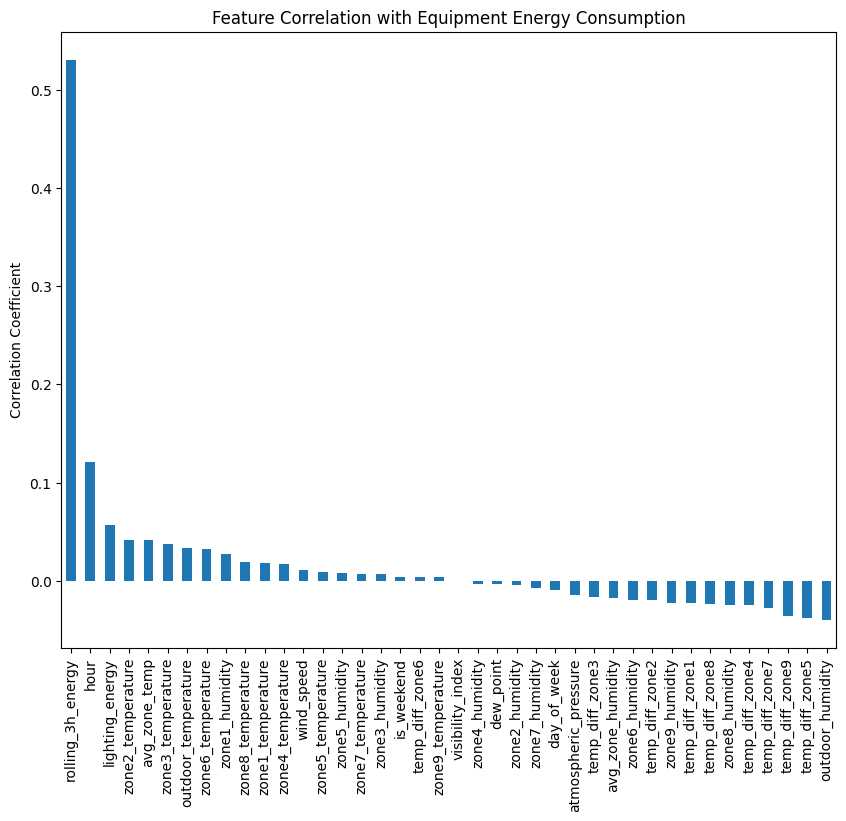

In [ ]:
# Plot correlations with target
correlations = engineered_df.corr()['equipment_energy_consumption'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
correlations.drop('equipment_energy_consumption').plot(kind='bar')
plt.title('Feature Correlation with Equipment Energy Consumption')
plt.ylabel('Correlation Coefficient')
plt.show()

In [ ]:
# Define features and target
target = 'equipment_energy_consumption'
features = [
    'lighting_energy', 'outdoor_temperature', 'outdoor_humidity',
    'wind_speed', 'dew_point', 'hour', 'is_weekend',
    'avg_zone_temp', 'avg_zone_humidity', 'rolling_3h_energy',
    'zone1_temperature', 'zone2_temperature', 'zone3_temperature',
    'atmospheric_pressure'
]

# Remove rows where target is missing
model_df = engineered_df.dropna(subset=[target])

# Split data
X = model_df[features]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create preprocessing and modeling pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler()),  # Standardize features
    ('model', GradientBoostingRegressor(random_state=42))  # Base model
])

# Define parameter grid for tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [2, 5]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Best Model Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Test R-squared: 0.260
Test RMSE: 140.910


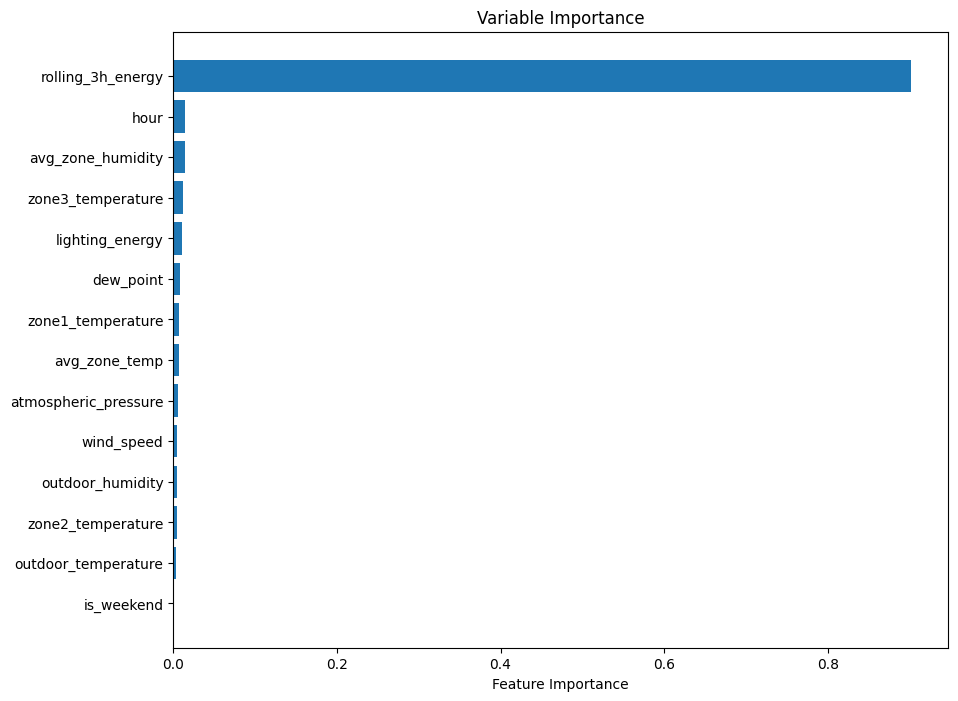

In [ ]:
# Evaluate on test set
y_pred = best_model.predict(X_test)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Test R-squared: {r2_score(y_test, y_pred):.3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

# Plot feature importance
feature_importance = best_model.named_steps['model'].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(features)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Variable Importance')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16013 non-null  object        
 2   lighting_energy               16048 non-null  object        
 3   zone1_temperature             15990 non-null  object        
 4   zone1_humidity                16056 non-null  object        
 5   zone2_temperature             16004 non-null  object        
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

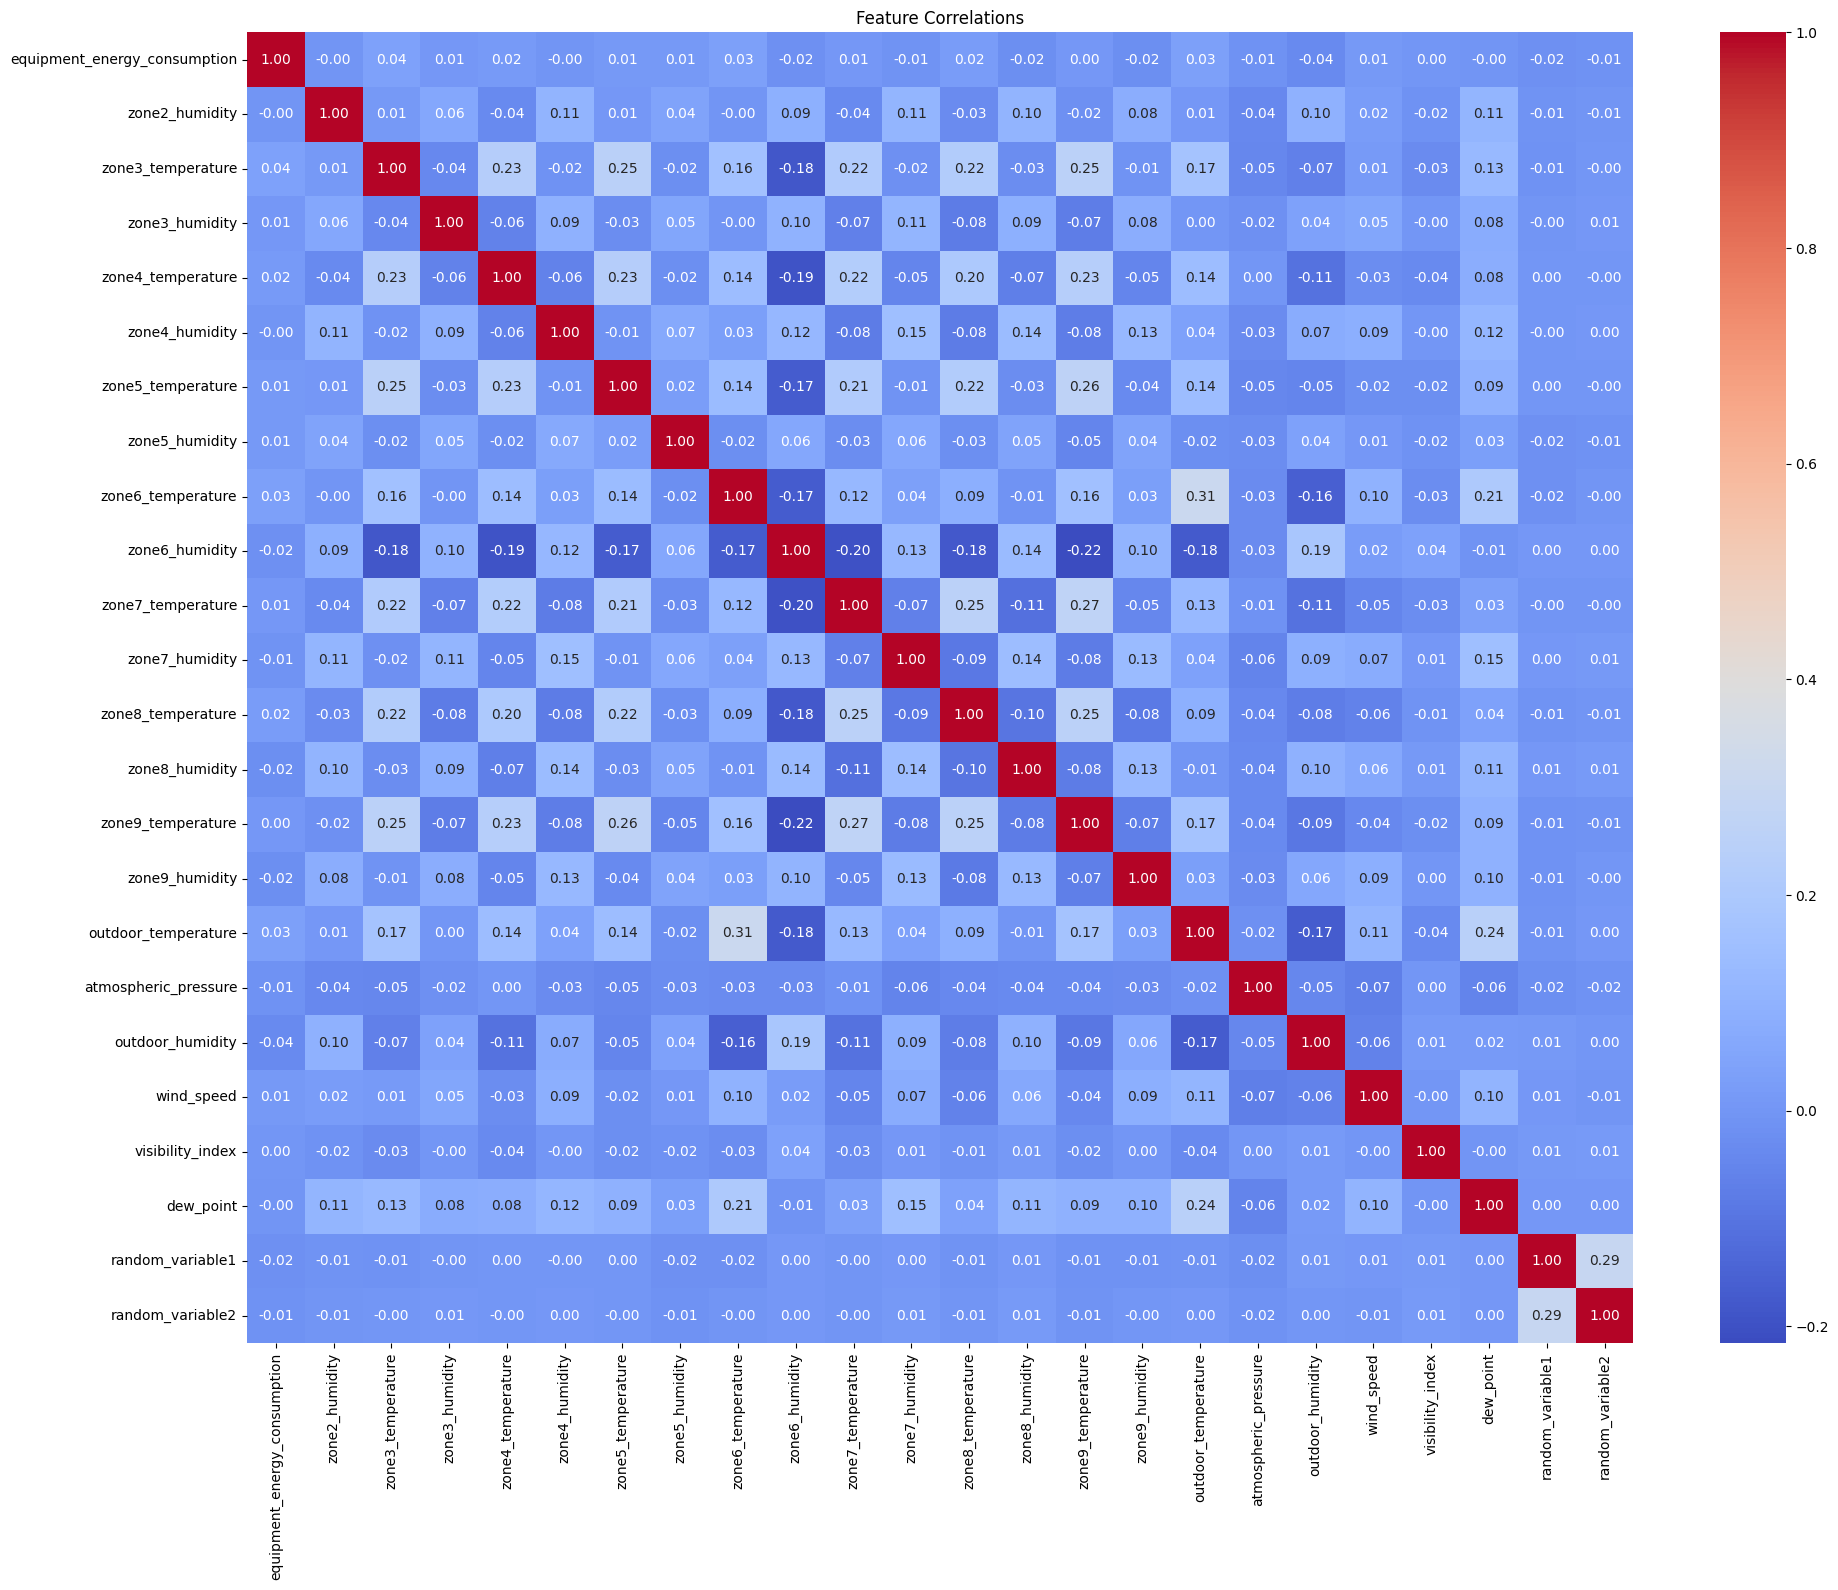

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_excel('data.xlsx')

# Basic statistics and information
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Convert 'equipment_energy_consumption' to numeric, coerce errors to NaN
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')

# Drop rows with NaN in 'equipment_energy_consumption'
df.dropna(subset=['equipment_energy_consumption'], inplace=True)

# Now, select only numeric features for correlation analysis
numeric_features = df.select_dtypes(include=np.number).columns
df_numeric = df[numeric_features]

# Visualize correlations for numeric features
plt.figure(figsize=(20, 16))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.tight_layout()
plt.savefig('correlations.png')

In [2]:
# Extract time-based features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

# Ensure temperature and humidity columns are numeric
for i in range(1, 10):
    df[f'zone{i}_temperature'] = pd.to_numeric(df[f'zone{i}_temperature'], errors='coerce')
    df[f'zone{i}_humidity'] = pd.to_numeric(df[f'zone{i}_humidity'], errors='coerce') # Convert humidity columns to numeric

# Calculate temperature differences (indoor vs outdoor)
for i in range(1, 10):
    df[f'temp_diff_zone{i}'] = df[f'zone{i}_temperature'] - df['outdoor_temperature']
    df[f'humid_diff_zone{i}'] = df[f'zone{i}_humidity'] - df['outdoor_humidity']

# Create interaction features
df['temp_humid_interaction'] = df['outdoor_temperature'] * df['outdoor_humidity']
df['wind_temp_interaction'] = df['wind_speed'] * df['outdoor_temperature']

# Calculate zonal statistics
df['avg_zone_temp'] = df[[f'zone{i}_temperature' for i in range(1, 10)]].mean(axis=1)
df['std_zone_temp'] = df[[f'zone{i}_temperature' for i in range(1, 10)]].std(axis=1)
df['avg_zone_humid'] = df[[f'zone{i}_humidity' for i in range(1, 10)]].mean(axis=1)
df['std_zone_humid'] = df[[f'zone{i}_humidity' for i in range(1, 10)]].std(axis=1)

Column lighting_energy couldn't be converted to numeric. Converting to categorical.
Data types after preprocessing:
lighting_energy              int8
zone1_temperature         float64
zone1_humidity            float64
zone2_temperature         float64
zone2_humidity            float64
zone3_temperature         float64
zone3_humidity            float64
zone4_temperature         float64
zone4_humidity            float64
zone5_temperature         float64
zone5_humidity            float64
zone6_temperature         float64
zone6_humidity            float64
zone7_temperature         float64
zone7_humidity            float64
zone8_temperature         float64
zone8_humidity            float64
zone9_temperature         float64
zone9_humidity            float64
outdoor_temperature       float64
atmospheric_pressure      float64
outdoor_humidity          float64
wind_speed                float64
visibility_index          float64
dew_point                 float64
hour                        int32


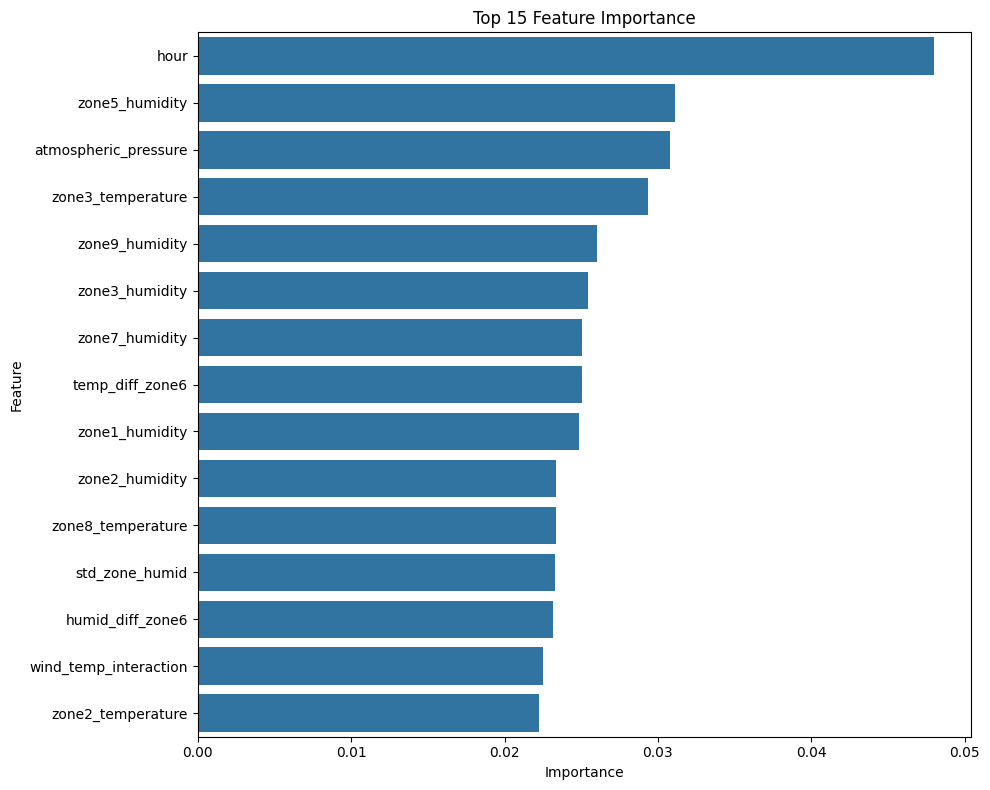

In [3]:
# Handle timestamp column properly
if 'timestamp' in df.columns:
    # Convert to datetime if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract datetime features before dropping
    df['hour'] = df['timestamp'].dt.hour
    df['day'] = df['timestamp'].dt.day
    df['month'] = df['timestamp'].dt.month
    df['weekday'] = df['timestamp'].dt.weekday
    df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

    # Then drop the original timestamp
    df = df.drop(['timestamp'], axis=1)

# Drop random variables if they exist
if 'random_variable1' in df.columns:
    df = df.drop(['random_variable1'], axis=1)
if 'random_variable2' in df.columns:
    df = df.drop(['random_variable2'], axis=1)

# Convert any string columns to numeric where possible
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            print(f"Column {col} couldn't be converted to numeric. Converting to categorical.")
            df[col] = df[col].astype('category').cat.codes

# Target and features
X = df.drop('equipment_energy_consumption', axis=1)
y = df['equipment_energy_consumption']

# Check data types before fitting
print("Data types after preprocessing:")
print(X.dtypes)

# Calculate feature importance using a basic model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 most important features:")
print(feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')

# Select top features (adjust threshold as needed)
top_features = feature_importance[feature_importance['Importance'] > 0.01]['Feature'].tolist()
X_selected = X[top_features]

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_features = X_selected.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_selected.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) if len(categorical_features) > 0 else ('cat', 'passthrough', [])
    ])

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Preprocess data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [5]:
# Define model pipeline
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(random_state=42))
])

# Define a smaller parameter grid for faster execution
param_grid = {
    'model__n_estimators': [100, 200],      # Reduced from [100, 200, 300]
    'model__learning_rate': [0.01, 0.1],    # Reduced from [0.01, 0.05, 0.1]
    'model__max_depth': [3, 6],             # Reduced from [3, 5, 7]
    'model__min_child_weight': [1, 5],      # Reduced from [1, 3, 5]
    'model__subsample': [0.8],              # Reduced from [0.7, 0.8, 0.9]
    'model__colsample_bytree': [0.8],       # Reduced from [0.7, 0.8, 0.9]
    'model__gamma': [0, 0.2]                # Reduced from [0, 0.1, 0.2]
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,                           # Reduced from 5 to 3 folds
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1                       # Uses all available CPU cores
)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"XGBoost Test R-squared: {r2:.3f}")
print(f"XGBoost Test RMSE: {rmse:.3f}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'model__colsample_bytree': 0.8, 'model__gamma': 0, 'model__learning_rate': 0.01, 'model__max_depth': 6, 'model__min_child_weight': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}
XGBoost Test R-squared: 0.064
XGBoost Test RMSE: 158.490


In [6]:
# Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('your_data.csv')

# Basic statistics
print("Basic statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for outliers in target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['equipment_energy_consumption'], kde=True)
plt.title('Distribution of Equipment Energy Consumption')
plt.savefig('target_distribution.png')
plt.close()

# Look for suspicious values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        if len(outliers) > 0:
            print(f"\nPossible outliers in {col}: {len(outliers)} values")
            print(f"Min: {outliers.min()}, Max: {outliers.max()}")

Basic statistics:
       equipment_energy_consumption  lighting_energy  zone1_temperature  \
count                  15945.000000     15945.000000       15054.000000   
mean                      95.810413         6.101537          21.251424   
std                      182.753554         2.087472           2.172463   
min                    -1139.985693        -1.000000           8.726818   
25%                       50.000000         6.000000          20.500000   
50%                       60.000000         6.000000          21.356667   
75%                      100.000000         6.000000          22.100000   
max                     1139.985693        18.000000          33.746609   

       zone1_humidity  zone2_temperature  zone2_humidity  zone3_temperature  \
count    15102.000000       15069.000000    15122.000000       15188.000000   
mean        39.067447          19.800708       39.500070          21.664800   
std          9.893749           2.950125       10.048101           2.

In [7]:
# Calculate correlations with target
correlations = df.corr()['equipment_energy_consumption'].sort_values(ascending=False)
print("\nTop correlations with equipment_energy_consumption:")
print(correlations)

# Visualize top correlations
plt.figure(figsize=(12, 8))
top_corr = correlations.abs().sort_values(ascending=False)[:15]
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 15 Feature Correlations with Energy Consumption')
plt.savefig('top_correlations.png')
plt.close()


Top correlations with equipment_energy_consumption:
equipment_energy_consumption    1.000000
hour                            0.120745
humid_diff_zone1                0.047027
zone2_temperature               0.042058
humid_diff_zone3                0.042043
avg_zone_temp                   0.041372
humid_diff_zone2                0.040044
zone3_temperature               0.038033
humid_diff_zone4                0.036663
humid_diff_zone5                0.036466
humid_diff_zone7                0.034423
outdoor_temperature             0.033223
zone6_temperature               0.032136
lighting_energy                 0.029724
humid_diff_zone8                0.028493
humid_diff_zone9                0.027729
zone1_humidity                  0.026997
wind_temp_interaction           0.023942
zone8_temperature               0.019716
temp_humid_interaction          0.019232
zone1_temperature               0.018402
zone4_temperature               0.017128
wind_speed                      0.011566
std_

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Prepare data - use only numeric columns for now
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols].drop('equipment_energy_consumption', axis=1)
y = df['equipment_energy_consumption']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='median') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform test data

# Linear Regression baseline
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression - R² = {r2_lr:.3f}, RMSE = {rmse_lr:.3f}")

# Decision Tree baseline
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Decision Tree - R² = {r2_dt:.3f}, RMSE = {rmse_dt:.3f}")

# Random Forest baseline
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest - R² = {r2_rf:.3f}, RMSE = {rmse_rf:.3f}")

Linear Regression - R² = 0.004, RMSE = 163.559
Decision Tree - R² = -1.357, RMSE = 251.554
Random Forest - R² = 0.059, RMSE = 158.923


In [10]:
# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Feature Importance from Random Forest')
plt.savefig('feature_importance.png')
plt.close()


Top 10 most important features:
                 Feature  Importance
35       temp_diff_zone6    0.031768
9         zone5_humidity    0.030984
1         zone1_humidity    0.029759
48        std_zone_humid    0.029673
19  atmospheric_pressure    0.029246
13        zone7_humidity    0.027085
4      zone3_temperature    0.026231
14     zone8_temperature    0.025908
15        zone8_humidity    0.025262
17        zone9_humidity    0.025259


In [11]:
# Check if any features are suspiciously predictive, which might indicate data leakage
for col in X.columns:
    if col != 'equipment_energy_consumption':
        correlation = df[col].corr(df['equipment_energy_consumption'])
        if abs(correlation) > 0.8:
            print(f"High correlation ({correlation:.3f}) between {col} and target - possible leakage?")
            plt.figure(figsize=(10, 6))
            plt.scatter(df[col], df['equipment_energy_consumption'], alpha=0.5)
            plt.title(f"Relationship between {col} and target")
            plt.xlabel(col)
            plt.ylabel('equipment_energy_consumption')
            plt.savefig(f'correlation_{col}.png')
            plt.close()

In [12]:
from sklearn.model_selection import cross_val_score

# Check if the model is consistent across folds
cv_scores = cross_val_score(RandomForestRegressor(random_state=42), X, y, cv=5,
                           scoring='r2')
print("\nCross-validation R² scores:")
print(cv_scores)
print(f"Mean: {cv_scores.mean():.3f}, Std: {cv_scores.std():.3f}")

# If standard deviation is high, model might be inconsistent
if cv_scores.std() > 0.1:
    print("Warning: High variance in cross-validation scores - model may be unstable")

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import learning_curve

# Check if more data would help
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(random_state=42), X, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2')

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.savefig('learning_curve.png')
plt.close()